In [3]:
import pickle

# Unpickle the file
with open(r"/content/sample_data/images.p", "rb") as f:
  images = pickle.load(f)

with open(r"/content/sample_data/labels.p", "rb") as f:
  labels = pickle.load(f) 

In [6]:
print(images.shape)
print(labels.shape)

(100, 100, 100)
(100,)


In [7]:
set(labels)

{'Asutosh'}

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [10]:
set(labels)

{0}

In [14]:
import numpy as np

In [17]:
n_persons = len(set(labels))
print("Number of persons: ", n_persons)
label_mapping = le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i, "-->", label_mapping[i])

Number of persons:  1
0 --> Asutosh


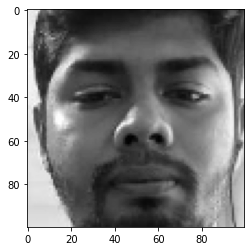

In [20]:
import matplotlib.pyplot as plt

plt.imshow(images[69], cmap=plt.get_cmap("gray"))
plt.show()

In [24]:
import cv2

In [28]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100, 100, 1)
  img = img/255
  return img

In [29]:
images = np.array(list(map(preprocessing, images)))
print("Shape of Input: ", images.shape)

Shape of Input:  (100, 100, 100, 1)


In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
labels = to_categorical(labels)

In [33]:
categories = labels.shape[1]
print(categories)

1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# import convolution layer
from tensorflow.keras.layers import Conv2D
# import pooling layer
from tensorflow.keras.layers import MaxPooling2D
# import faltten layer
from tensorflow.keras.layers import Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(categories, activation="softmax"))
model.compile(Adam(lr=0.01), loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
progress = model.fit(images, labels, validation_split=0.2, epochs = 10,
                     batch_size=50, verbose=1)

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1960 - accuracy: 0.9422 - val_loss: 0.0623 - val_accuracy: 0.9796
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9841 - val_loss: 0.0499 - val_accuracy: 0.9845
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.0475 - val_accuracy: 0.9852
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0540 - val_accuracy: 0.9847
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0564 - val_accuracy: 0.9844
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0162 - accuracy: 0.9952 - val_loss: 0.0532 - val_accuracy: 0.9854
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0819 - val_accuracy: 0.9785
Epoch 

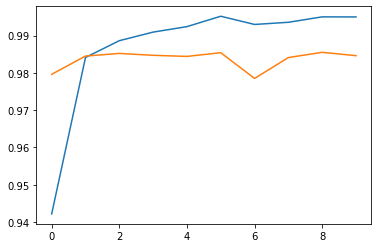

In [ ]:
plt.plot(progress.history['accuracy'])
plt.plot(progress.history['val_accuracy'])
plt.show()